In [10]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn import metrics

In [7]:
# load load_breast_cancer
data = sklearn.datasets.load_breast_cancer()
x1 = np.where(data["feature_names"] == "mean area")[0][0]
y1 = np.where(data["feature_names"] == "mean concave points")[0][0]

In [8]:
# normalize (use StandardScaler if you wish)
x0 = np.asarray([data["data"][:,x1], data["data"][:,y1], np.ones(data["data"].shape[0])]).T
y0 = (1.*(data["target"]==np.where(data["target_names"] == "malignant")[0][0]) +
     -1.*(data["target"]==np.where(data["target_names"] == "benign")[0][0]))
X,y = x0.copy()[:,:-1],y0.copy() 
norm = StandardScaler()
norm.fit(X)

StandardScaler()

In [9]:
# partition with test size 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
# fit logistic regression and draw ROC curve
# use predict_log_proba()
l_reg = LogisticRegression(random_state=45)
l_reg.fit(X_train, y_train)
n_prob =[0 for _ in range(len(y_test))]
l_prob = l_reg.predict_log_proba(X_test)
l_prob= l_prob[:,1]

#ROC Curve
n_fpr, n_tpr, _ = roc_curve(y_test,n_prob)
l_fpr, l_tpr, _ = roc_curve(y_test, l_prob)

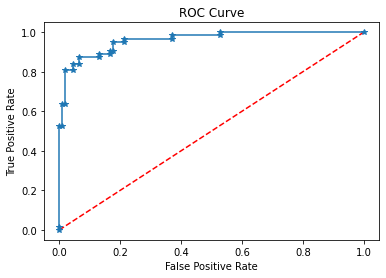

In [18]:
plt.title("ROC Curve")
plt.plot(n_fpr,n_tpr,'r--')
plt.plot(l_fpr,l_tpr, marker='*')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# What happens to the mean accuracy on the given test data, that is "score", when C = 1, 1/10, 1/50, 1/100, 1/1000?